In [4]:
from sympy import *

x = symbols('x')

In [5]:
diff(x**2, x).subs(x, 2).doit()

4

In [11]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

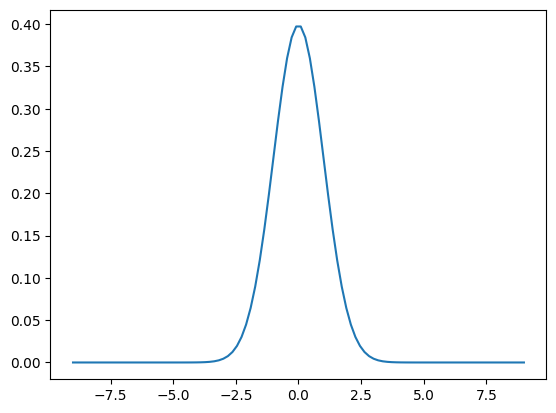

In [12]:
mean = 0
std_dev = 1

x = np.linspace(-9, 9, 100)

y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y)

In [13]:
x = stats.norm.cdf(98.2, 18, 2.4)
print(x)

1.0


In [15]:
n = 25

lower = stats.t.ppf(0.025, df=n-1)
upper = stats.t.ppf(0.975, df=n-1)

print(lower, upper)

-2.063898561628021 2.0638985616280205


In [20]:
import math

values = [1.78, 1.75, 1.72, 1.74, 1.77]

mean = sum(values)/ len(values)

std_dev = sum([(x-mean)**2 for x in values]) / (len(values)-1)

print(mean, math.sqrt(std_dev))

1.752 0.023874672772626667


In [21]:
from scipy.stats import norm

mean = 42
std_dev = 8

print(norm.cdf(30, mean, std_dev) - norm.cdf(20, mean, std_dev))

0.0638274380338035


In [22]:
from scipy.stats import norm

n = 34
mean = 1.715588
std_dev = 0.029252

# 99% confidence interval

lower = norm.ppf(0.005, mean, std_dev)
upper = norm.ppf(0.995, mean, std_dev)

print(lower, upper)

1.6402398412125874 1.7909361587874124


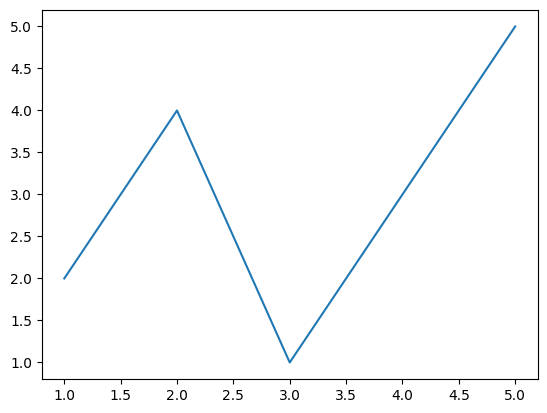

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

plt.plot(x, y)

In [7]:
import pandas as pd
import math

df = pd.read_csv("../data.csv", delimiter=",").itertuples()

residuals = []

m = 1.832
b = 4.7

for point in df:
    actual = point.y
    predicted = m*point.x + b
    residuals.append(round(math.pow(actual - predicted, 2), 2))

print(residuals)

[2.35, 2.68, 0.04, 8.83, 0.02, 0.48, 2.18, 1.84, 14.53, 0.0]


In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv("https://tinyurl.com/yck9mv5h", delimiter=",")

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

fit = LogisticRegression(penalty=None).fit(X, Y)
kfold = KFold(n_splits=3, random_state=7, shuffle=True)

coeff = [round(i, 2) for i in list(fit.coef_.flatten())]
coeffs = fit.coef_.flatten()
intercept = round(fit.intercept_.flatten()[0], 3)

print(f'Red has a coefficient of {coeff[0]}\nBlue has a coefficient of {coeff[1]}\nGreen has a coefficient of {coeff[2]}\nIntercept is {intercept}')

print("Validation")
results = cross_val_score(fit, X, Y, cv=kfold)
print(f"Mean Accuracy: {round(results.mean(), 3)}\nStandard Deviation: {round(results.std(), 3)}")

print("AUC")

results = cross_val_score(fit, X, Y, cv=kfold, scoring="roc_auc")
print(f"Mean AUC: {round(results.mean(), 3)}\nStandard Deviation: {round(results.std(), 3)}")

print("Predict")

pred = fit.predict([[103, 123, 255]])
print(f"Predicted Probability: {pred}")

Red has a coefficient of 11.74
Blue has a coefficient of 23.11
Green has a coefficient of 4.42
Intercept is -5008.706
Validation
Mean Accuracy: 1.0
Standard Deviation: 0.0
AUC
Mean AUC: 1.0
Standard Deviation: 0.0
Predict
Predicted Probability: [1]


c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy import stats
import numpy as np

df = pd.read_csv("https://bit.ly/3iUHo3I", delimiter=",")

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

fit = LogisticRegression(penalty=None).fit(X, Y)
coeffs = list(fit.coef_.flatten())

# Get b0 and b1
b0 = fit.intercept_[0]
b1 = coeffs[0]

# Calculate R^2


def logistic_function(x):
    p = 1.0 / (1.0 + np.exp(-(b0 + b1 * x)))
    return p


log_likelihood_fit = sum([math.log(logistic_function(x)) * y + (1 - y) *
                         math.log(1 - logistic_function(x)) for x, y in zip(X.values, Y.values)])
likelihood = sum(Y.values) / len(Y)
log_likelihood = sum([math.log(likelihood) * y + (1 - y) *
                     math.log(1 - likelihood) for y in Y.values])

R2 = 1 - (log_likelihood_fit / log_likelihood)

print(f"R^2: {R2}")

# P value

chi = 2 * (log_likelihood_fit - log_likelihood)

p = 1 - stats.chi2.cdf(chi, df=X.shape[1])

print(f"P value: {p}")

R^2: -1.1920504002374148
P value: 1.0
